In [3]:
from sklearn import datasets
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


def kume_merkezlerini_yeniden_hesapla(refler, noktalar, kumeler):
    for k in range(refler.shape[0]):
        refler[k] = noktalar[kumeler==k].mean(axis=0)

    return refler

def noktalari_kumelere_ata(noktalar, merkezler):
    c=((noktalar[:, None, :] - merkezler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    return c

def noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, merkezler, kumeler):
    wcs = 0
    for k in range(merkezler.shape[0]):
        wcs += ((noktalar[kumeler==k] - merkezler[k])**2).sum()
    return wcs

@interact(iters=(0,40,1), seed=(0,100,1), kmeans=(2,10,1), dseed=(0,100,1))
def kviz(iters=0, seed=0, kmeans=5, dseed=40):
    wcss = []
    X, bilmiyoruz = datasets.make_blobs(random_state=dseed, centers=kmeans, n_samples=200)
    np.random.seed(seed)
    inds = list(range(X.shape[0]))
    noks = np.random.choice(inds, size=kmeans, replace=False)
    noktalar = X
    refler = noktalar[noks]
    c=((noktalar[:, None, :] - refler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    plt.figure(figsize=(12, 8))
    plt.subplot(121)
    plt.title("t=0: Cluster centers are randomly assigned")

    for _ in range(iters):
        if _ % 2 == 0:
            plt.title(f"t={_+1}: Step: Maximization (Cluster centers re-calculated)")
            refler = kume_merkezlerini_yeniden_hesapla(refler, noktalar, c)
        else:
            plt.title(f"t={_+1}: Step: Expectation (Samples re-assigned to clusters)")
            c = noktalari_kumelere_ata(noktalar, refler)
        wcs = noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, refler, c)
        wcss.append(wcs)
    plt.scatter(*noktalar.T, c=c, cmap='rainbow')
    plt.scatter(*refler.T, s=400, edgecolors='k', marker='*', c=range(kmeans), cmap='rainbow')
    plt.grid()
    plt.subplot(122)
    plt.plot(range(iters), wcss, marker='o')
    plt.title("Sum of squared distances to cluster centers")
    plt.grid()
    plt.xlabel("Iterations")
    plt.ylabel("WCSS")

interactive(children=(IntSlider(value=0, description='iters', max=40), IntSlider(value=0, description='seed'),…

In [33]:
#seed=48 dseed=40 istenilen bir durum oluşmadı

In [4]:
from sklearn import datasets

In [6]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=7, center_box=(-100.0, 100.0))

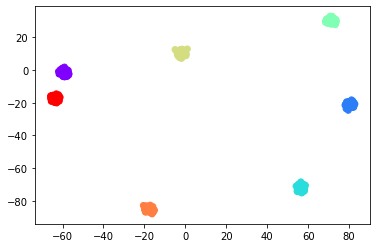

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

In [8]:
from sklearn.cluster import KMeans

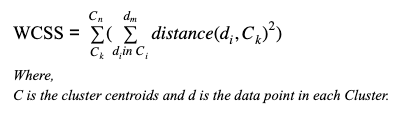

In [9]:
WCSS = []
for k in range(1,25):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(X)
    WCSS.append(model.inertia_) 
    

c:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
WCSS

[4675356.776708572,
 1979729.0757398582,
 990903.180221878,
 587576.7481831824,
 214917.97454882803,
 21530.29305801637,
 2057.2037281881167,
 1945.576037719182,
 1857.9915823099714,
 1747.295642644263,
 1647.775323341156,
 1552.3586744260106,
 1468.5684956725165,
 1398.7393221754112,
 1287.2060762238784,
 1221.4435367889328,
 1152.7306981203571,
 1109.151878775609,
 1026.9906062584687,
 1010.2223369123469,
 952.0711543601487,
 884.5530845681734,
 857.1721322916817,
 823.6705297953627]

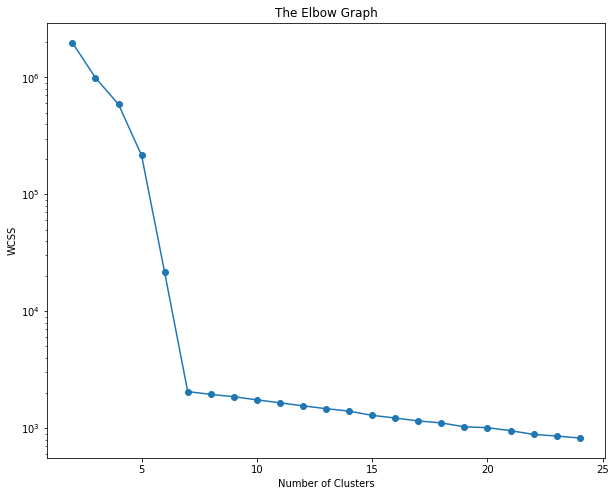

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(2,25), WCSS[1:], marker='o')
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.semilogy()
plt.show()

In [15]:
import scipy.stats as scs

In [17]:
d1 = scs.norm([0, 0], [5, 5])

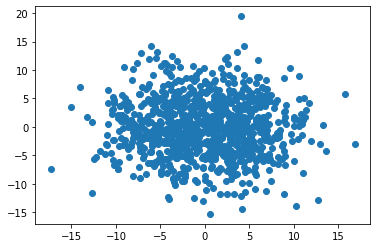

In [18]:
k1 = d1.rvs((1000,2))
plt.scatter(*d1.rvs((1000,2)).T)

In [19]:
d2 = scs.norm([15,-10], [1, 1])

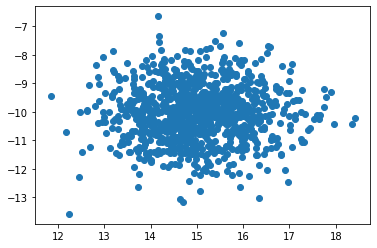

In [20]:
k2 = d2.rvs((1000,2))
plt.scatter(*d2.rvs((1000,2)).T)

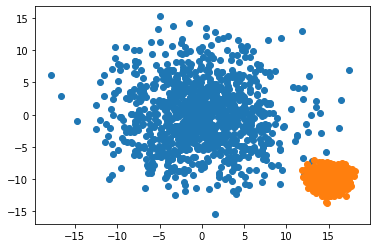

In [21]:
plt.scatter(*d1.rvs((1000,2)).T)
plt.scatter(*d2.rvs((1000,2)).T)

In [22]:
data = np.concatenate([k1, k2], axis=0)
data

array([[  5.12182406,  -5.33426124],
       [  5.90387397,  -6.49577565],
       [  6.62505001,  -4.64052582],
       ...,
       [ 14.71767504,  -8.72777352],
       [ 15.17625633,  -9.88042329],
       [ 15.06306641, -13.01594543]])

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

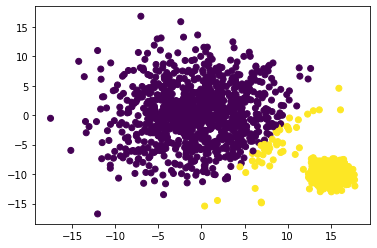

In [25]:
plt.scatter(*data.T, c=kmeans.predict(data));

In [83]:
# kümelerin eşit std sapmaya sahip olduğunu varsayıyor. 

In [26]:
data1, y = datasets.make_moons(n_samples=1000, noise=0.1)

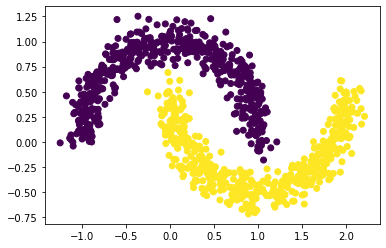

In [27]:
plt.scatter(*data1.T, c=y)

In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)

KMeans(n_clusters=2)

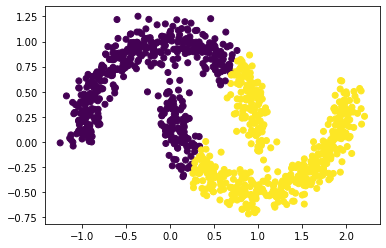

In [29]:
plt.scatter(*data1.T, c=kmeans.predict(data1))

In [92]:
# yine aynı varsayımda bulundu. std sapmaları eşit kabul etti. Bu durumlarda Kmeans başarısız oluyor.

In [30]:
WCSS = []
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(data1)
    WCSS.append(model.inertia_) 

c:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


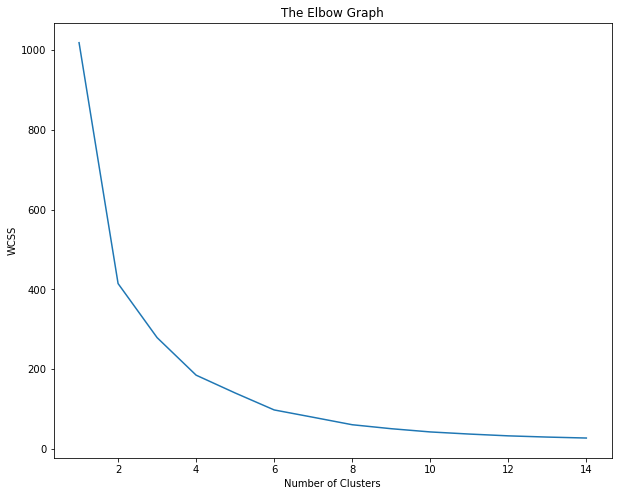

In [32]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), WCSS)
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()